In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [2]:
iris = pd.read_csv('iris.csv')
iris.drop('caseno', axis=1, inplace=True)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


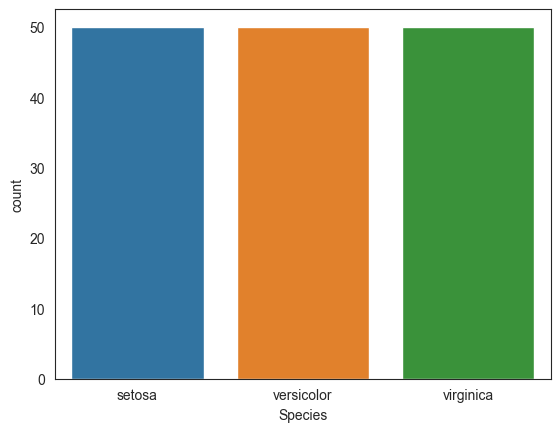

In [4]:
# 클래스(품종) 분포 확인
sns.countplot(data=iris, x='Species')
plt.show()

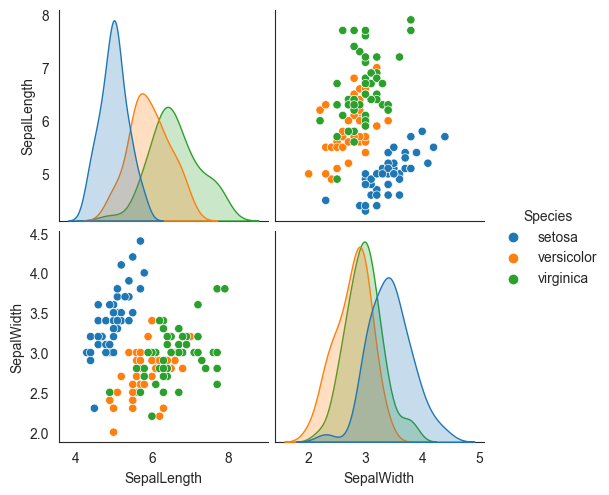

In [5]:
iris1 = iris[['SepalLength', 'SepalWidth', 'Species']]
sns.pairplot(iris1, hue="Species")
plt.show()

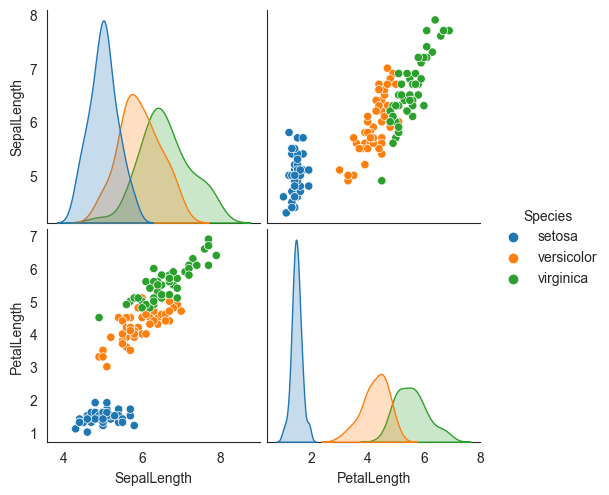

In [6]:
iris2 = iris[['SepalLength', 'PetalLength', 'Species']]
sns.pairplot(iris2, hue="Species")
plt.show()

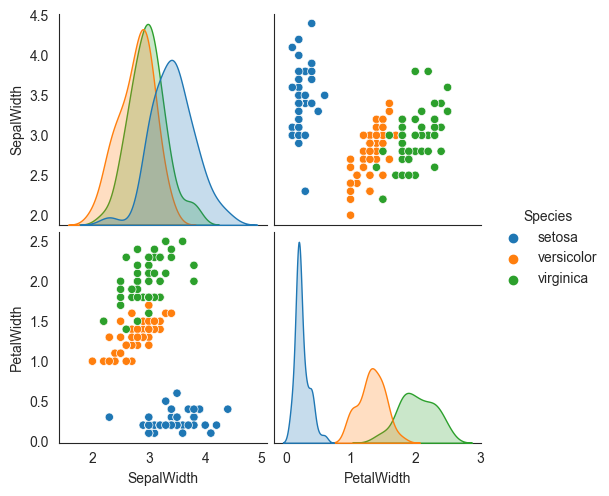

In [7]:
iris3 = iris[['SepalWidth', 'PetalWidth', 'Species']]
sns.pairplot(iris3, hue="Species")
plt.show()

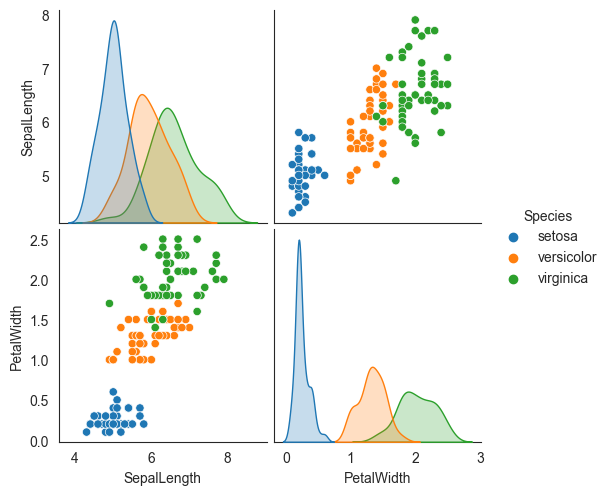

In [8]:
iris4 = iris[['SepalLength', 'PetalWidth', 'Species']]
sns.pairplot(iris4, hue="Species")
plt.show()

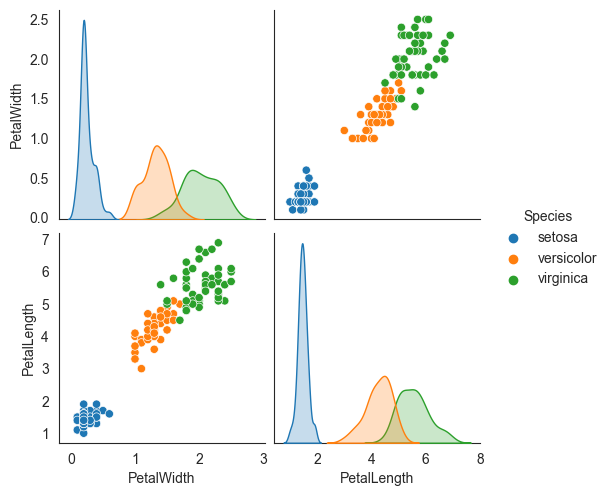

In [9]:
iris5 = iris[['PetalWidth', 'PetalLength', 'Species']]
sns.pairplot(iris5, hue="Species")
plt.show()

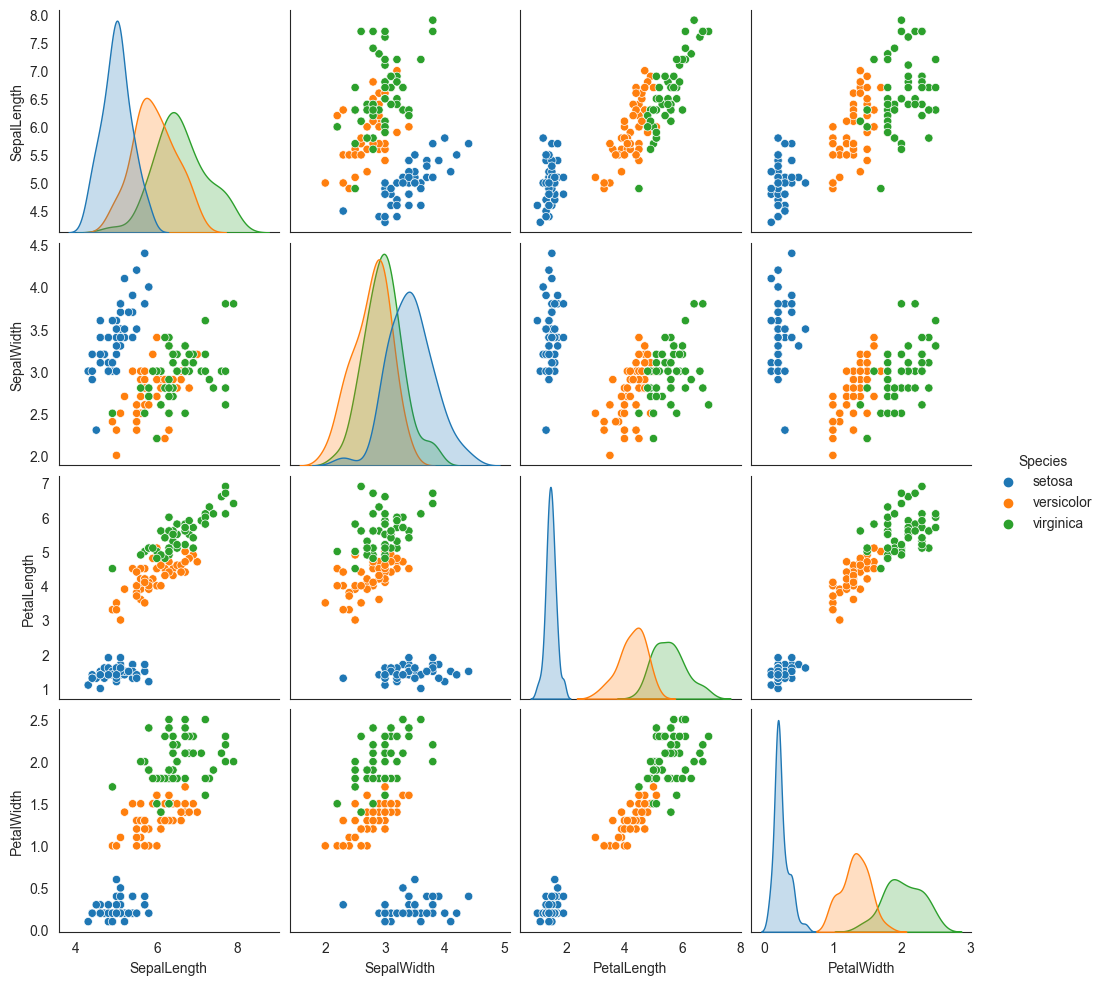

In [10]:
sns.pairplot(iris, hue="Species")
plt.show()

In [11]:
iris = iris.to_numpy()
check = {'setosa':0, 'versicolor':1, 'virginica':2}

for i in range(len(iris)):
    iris[i][4] = check[iris[i][4]]

In [12]:
x_data = iris[:, 0:4].astype(float)
y_data = iris[:, 4].astype(int)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=42, test_size=0.2, stratify = y_data)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [15]:
train_pred = LR.predict(x_train)
test_pred = LR.predict(x_test)

print("model score train : ", LR.score(x_train, y_train))
print("model score test : ", LR.score(x_test, y_test))

model score train :  0.975
model score test :  0.9666666666666667


In [16]:
check = {0:'setosa', 1:'versicolor', 2:'virginica'}
print('data'.center(17), '답안지'.center(7), '예측'.center(7), '정오'.center(13))
for i in range(30):
    print(x_test[i], check.get(y_test[i]).ljust(10), check.get(test_pred[i]).ljust(11), end="  ")
    result = '정답' if y_test[i] == test_pred[i] else '       오답'
    print(result)

       data         답안지      예측         정오     
[4.4 3.  1.3 0.2] setosa     setosa       정답
[6.1 3.  4.9 1.8] virginica  virginica    정답
[4.9 2.4 3.3 1. ] versicolor versicolor   정답
[5.  2.3 3.3 1. ] versicolor versicolor   정답
[4.4 3.2 1.3 0.2] setosa     setosa       정답
[6.3 3.3 4.7 1.6] versicolor versicolor   정답
[4.6 3.6 1.  0.2] setosa     setosa       정답
[5.4 3.4 1.7 0.2] setosa     setosa       정답
[6.5 3.  5.2 2. ] virginica  virginica    정답
[5.4 3.  4.5 1.5] versicolor versicolor   정답
[7.3 2.9 6.3 1.8] virginica  virginica    정답
[6.9 3.1 5.1 2.3] virginica  virginica    정답
[6.5 3.  5.8 2.2] virginica  virginica    정답
[6.4 3.2 4.5 1.5] versicolor versicolor   정답
[5.  3.4 1.5 0.2] setosa     setosa       정답
[5.  3.3 1.4 0.2] setosa     setosa       정답
[5.8 4.  1.2 0.2] setosa     setosa       정답
[5.6 2.5 3.9 1.1] versicolor versicolor   정답
[6.1 2.9 4.7 1.4] versicolor versicolor   정답
[6.  3.  4.8 1.8] virginica  virginica    정답
[5.4 3.7 1.5 0.2] setosa     setosa       정답
[6.7 3.

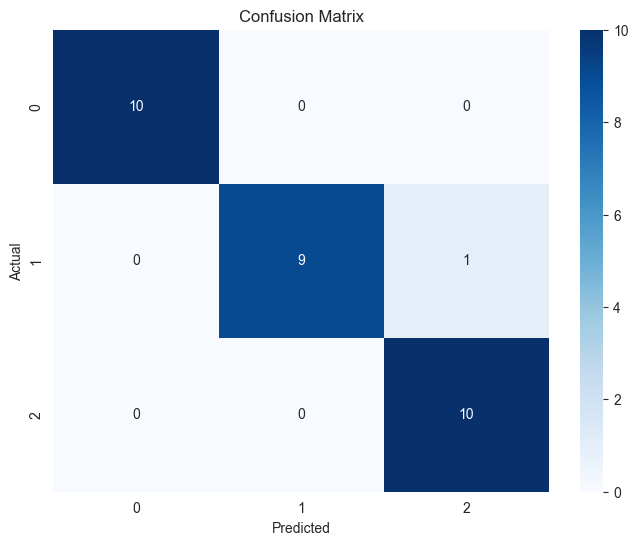

In [17]:
# 혼동 행렬(confusion matrix) 생성
cm = confusion_matrix(y_test, test_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()